In [46]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [47]:
#download multiple files with one code
dataframes={}
dataframes_pivot={}
for i in range(13,19):
    variable = "/Users/francopallitto/Documents/DS_projects/nispera/data/processed/pre_processed/Mode of operation/ID" + str(i) + ".csv"
    df=pd.read_csv(variable)
    df_pivot=df.pivot(index="datetime", columns = "variable", values = "value")
    dataframes[i] = df
    dataframes_pivot[i]=df_pivot

In [48]:
#you create a dictionary to establish an oder in the charts
# each variable gas a number asigned
dict_order_charts = {} 
count = 0 
for column in dataframes_pivot[15].columns:
    dict_order_charts[column] = count
    count += 1

# Variables vs Grid Power in Different Turbines


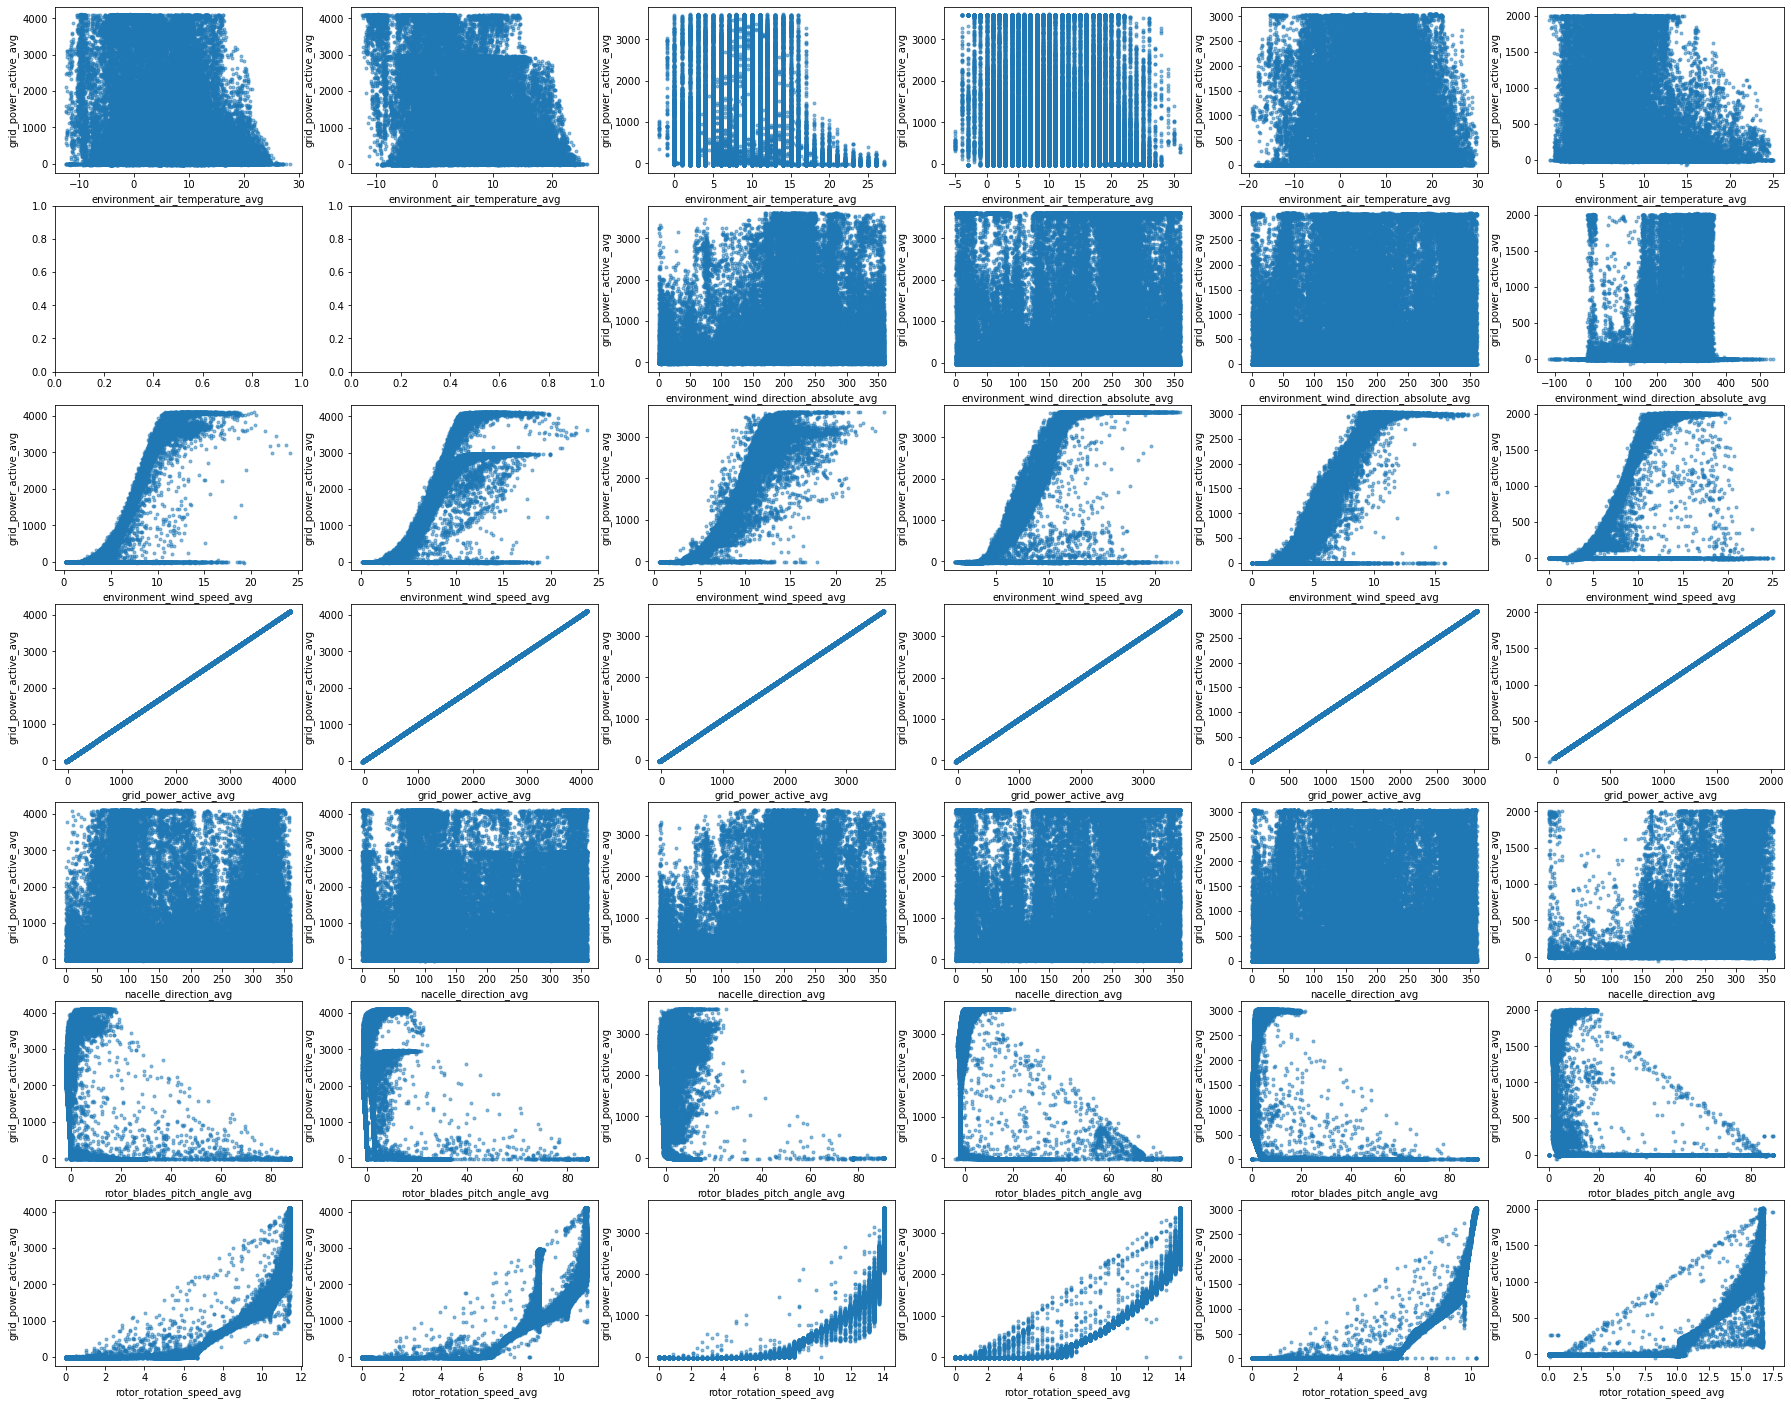

In [50]:
#this is for plotting the whole range of variable in the different set.
#first number after subplots it's the number of variables
#second is the number of df
size = 9
fig, axs = plt.subplots(7, 6, sharex=False, sharey=False, figsize=(31, 25))
for key in dataframes_pivot.keys():
    for index, name in enumerate(dataframes_pivot[key].columns):
        #here in 13 you should place the id of the first data frame
        col = key-13
        row = dict_order_charts[name]
        ax = axs[row][col]
        dataframes_pivot[key].plot.scatter(ax=ax, x=name, y="grid_power_active_avg", s=size, alpha=.5)
plt.savefig('mode_of_operation.png')

# Cross Matrix Charts

Plotting one DF in many variables

In [53]:
data_file = "/Users/francopallitto/Documents/DS_projects/nispera/data/processed/pre_processed/Power curve shifts/ID3.csv"
df = pd.read_csv(data_file)
df
#pivot the document
df_pivot = df.pivot(index="datetime", columns = "variable", values = "value")



In [54]:
df_pivot.columns

Index(['environment_air_temperature_avg',
       'environment_wind_direction_absolute_avg', 'environment_wind_speed_avg',
       'grid_power_active_avg', 'nacelle_direction_avg',
       'rotor_blades_pitch_angle_avg', 'rotor_rotation_speed_avg'],
      dtype='object', name='variable')

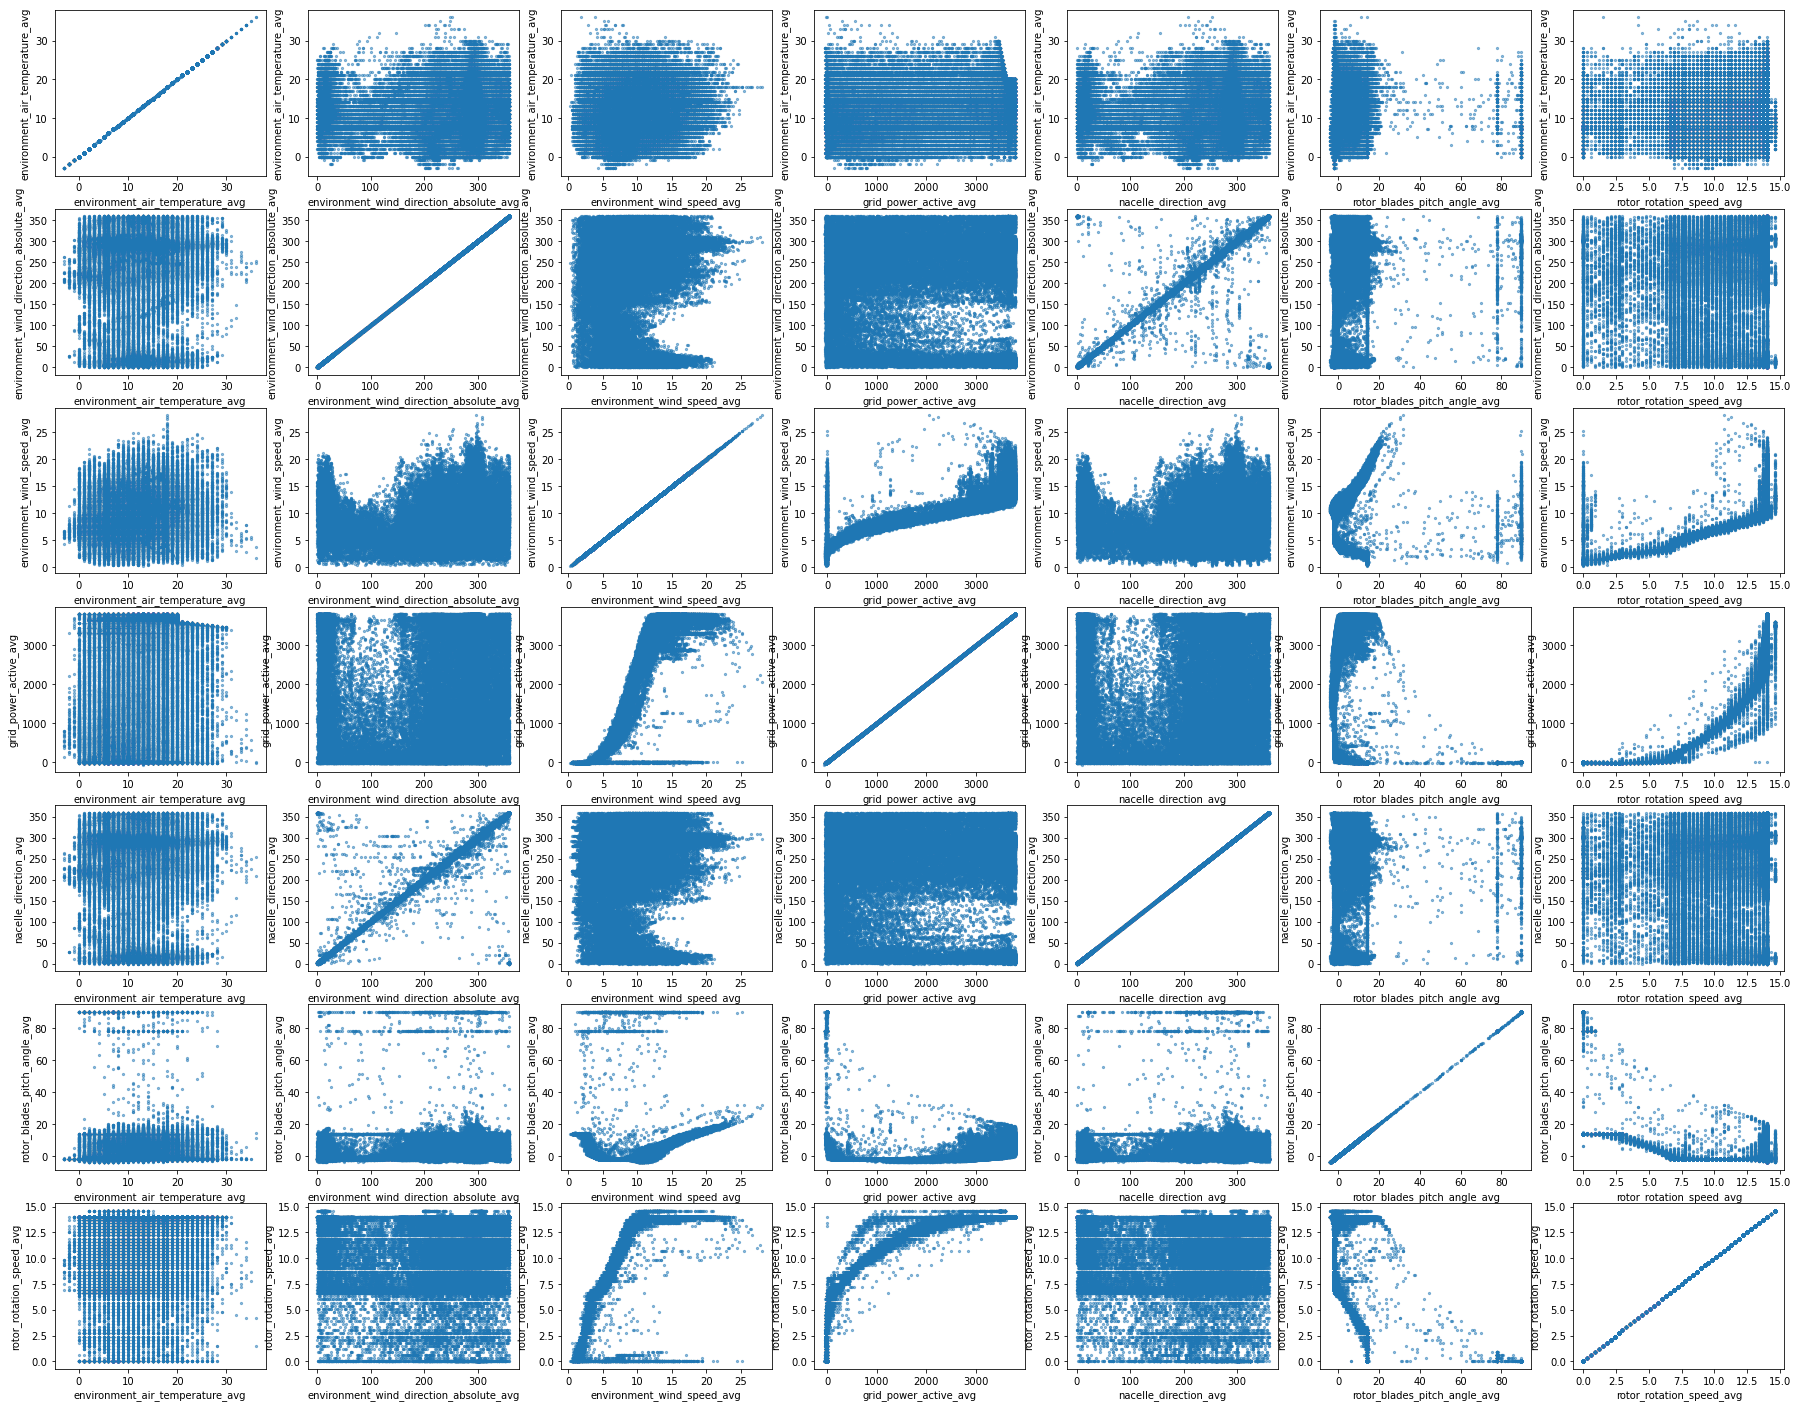

In [58]:
dict_order_charts = {} 
count = 0 

for column in df_pivot.columns:
    dict_order_charts[column] = count
    count += 1
dict_order_charts

size =5
fig, axs = plt.subplots(7, 7, sharex=False, sharey=False, figsize=(31, 25))

for index, xname in enumerate(df_pivot.columns):
    col = index
    for index, yname in enumerate(df_pivot.columns):
        row = dict_order_charts[yname]
        ax = axs[row][col]
        df_pivot[df_pivot.columns].plot.scatter(ax = ax, x=xname, y=yname, s=size, alpha=.5)
        
        